## Try MIDAS 

In [41]:
# conda install pytorch torchvision -c pytorch


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda





The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.05=py38_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::dask==2021.4.0=pyhd3eb1b0_0
  - defaults/win-64::distributed==2021.4.0=py38haa95532_0
  - defaults/noarch::flask==1.1.2=pyhd3eb1b0_0
  - defaults/noarch::nltk==3.6.1=pyhd3eb1b0_0
  - defaults/noarch::pyls-black==0.4.6=hd3eb1b0_0
  - defaults/win-64::spyder==4.2.5=py38haa95532_0


  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py38haa95532_0         936 KB
    cudatoolkit-11.3.1         |       h59b6b97_2       545.3 MB
    libuv-1.40.0               |       he774522_0         255 KB
    pytorch-1.12.1             |py3.8_cuda11.3_cudnn8_0        1.19 GB  pytorch
    pytorch-mutex-1.0          |             cuda           3 KB  pytorch
    torchvision-0.13.1         |       py38_cu113         7.4 MB  pytorch
    ------------------------------------------------------------
                                           Total:        1.74 GB

The following NEW packages will be INSTALLED:

  click              pkgs/main/noarch::click-7.1.2-pyhd3eb1b0_0
  cudatoolkit        pkgs/main/win-64::cudatoolkit-11.3.1-h59b6b97_2
  libuv              pkgs/main/win-64::libuv-1.40.0-he774522_0


In [40]:
# !pip3 install tqdm
# !pip3 install boto3

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [43]:
import pandas as pd
import requests
import regex
import torch
import boto3
import tqdm


In [1]:
# import os
# os.getcwd()

'C:\\Users\\Ника\\Desktop\\PY\\PRACTICE\\DA'

In [44]:
# python run_classifier.py --data_dir da_data/ --bert_model bert-base-uncased --task_name da --output_dir output --do_train --do_eval --binary_pred

SyntaxError: invalid syntax (<ipython-input-44-a58ff89d5122>, line 1)

# Adjacency Pairs frequency analisys on DD annotation

## Dataset 

In [40]:
from collections import Counter

In [2]:
path_text = 'dialogues_text.txt'
with open(path_text, 'r',encoding="utf-8") as f:
    text = f.read().splitlines()
path_act = 'dialogues_act.txt'
with open(path_act, 'r',encoding="utf-8") as f:
    act = f.read().splitlines()

In [12]:
dialogues = pd.DataFrame(list(zip(text, act)),
               columns =['text', 'act'])
display(dialogues)

,text,act
0,The kitchen stinks . __eou__ I'll throw out th...,3 4
1,"So Dick , how about getting some coffee for to...",3 4 3 1 1
2,Are things still going badly with your housegu...,2 1 3 4
3,Would you mind waiting a while ? __eou__ Well ...,3 2 1 1
4,Are you going to the annual party ? I can give...,3 4 1
...,...,...
13113,You have done an excellent job this year and w...,1 1 3 2 1 2 1 1
13114,Lindsay Tipping gave me your name as a referen...,1 1 2 1 2 1
13115,The consignments of chemical instruments have ...,3 2 1 2 1 3 3 3 4
13116,good morning . How can I help you ? __eou__ I'...,2 3 2 2 3 2 1 1 2 2 1 2 1 2 1 1 1


In [14]:
dialogues.to_csv('C:\\Users\\Ника\\Desktop\\PY\\PRACTICE\\dataset\\dialogues_act.csv', index=False) 

In [3]:
dialogues["text"][13116]

NameError: name 'dialogues' is not defined

In [4]:
path_act = 'dialogues_act.txt'
text_data = open(path_act, 'r').read().splitlines()

text_data

['3 4 ',
 '3 4 3 1 1 ',
 '2 1 3 4 ',
 '3 2 1 1 ',
 '3 4 1 ',
 '2 1 2 1 3 4 3 4 3 ',
 '2 2 3 4 ',
 '2 1 2 1 2 1 1 2 1 ',
 '3 4 ',
 '2 1 2 1 1 ',
 '2 1 2 1 ',
 '3 4 3 3 4 3 ',
 '2 3 4 1 ',
 '3 4 1 2 3 4 ',
 '3 4 ',
 '2 1 1 1 3 4 ',
 '2 1 1 3 2 1 ',
 '2 2 1 1 ',
 '1 2 1 1 ',
 '2 1 2 1 2 1 3 ',
 '3 4 ',
 '2 2 1 1 ',
 '2 1 3 2 3 4 2 1 ',
 '2 1 1 2 1 2 3 4 ',
 '2 3 2 1 ',
 '1 1 1 1 ',
 '3 4 1 3 ',
 '2 3 4 1 ',
 '1 3 4 1 ',
 '2 1 ',
 '1 1 ',
 '3 4 ',
 '1 1 ',
 '3 4 2 1 1 1 ',
 '2 3 4 2 1 1 1 1 ',
 '3 2 1 1 2 1 1 1 ',
 '2 1 2 1 2 1 1 1 3 4 1 1 1 1 1 1 ',
 '2 1 2 1 ',
 '3 4 ',
 '2 1 1 1 ',
 '2 1 1 2 1 2 1 1 ',
 '2 3 4 1 1 1 3 4 ',
 '2 2 1 1 1 2 2 1 ',
 '2 1 ',
 '1 1 2 2 ',
 '1 1 2 1 2 1 ',
 '1 2 ',
 '1 2 1 2 1 2 1 2 3 4 ',
 '1 2 1 2 3 4 ',
 '2 2 1 3 ',
 '1 1 ',
 '2 1 3 4 ',
 '1 3 ',
 '1 1 ',
 '2 1 ',
 '1 2 2 1 ',
 '2 2 2 1 2 2 1 1 ',
 '2 2 1 3 ',
 '3 2 1 2 1 ',
 '1 1 1 2 ',
 '2 1 2 1 2 1 2 1 ',
 '3 4 ',
 '2 2 2 3 4 ',
 '2 1 ',
 '3 2 1 1 2 1 2 1 ',
 '2 1 ',
 '2 1 3 4 2 1 ',
 '3 2 3 4 3 4 1 1 3 4

In [37]:
freq_count = {}
for line in text_data:
    class_num = line.split()
    index = 1
    for sign in class_num[index:]: 
        # для каждого в списке слов датасета, начиная со второго слова
        
        key = class_num[index-1] # ключ - это предыдущее слово
        if key in freq_count:
            freq_count[key].append(sign)
            # если слово уже в ключах, добавляем к нему в лист значений новое
        else:
            freq_count[key] = [sign] # в ином создаем лист для значений
        index += 1

In [53]:
# 1: inform，2: question, 3: directive, 4: commissive

freq_1 = Counter(freq_count["1"])
freq_2 = Counter(freq_count["2"])
freq_3 = Counter(freq_count["3"])
freq_4 = Counter(freq_count["4"])
print("1 inform follows", freq_1, "\n",
      "2 question follows", freq_2, "\n",
      "3 directive follows",freq_3, "\n",
      "4 commissive follows",freq_4)

1 inform follows Counter({'1': 17843, '2': 14238, '3': 5598, '4': 545}) 
 2 question follows Counter({'1': 21817, '3': 3894, '2': 3277, '4': 35}) 
 3 directive follows Counter({'4': 9014, '2': 3765, '3': 2108, '1': 983}) 
 4 comissive follows Counter({'3': 2582, '1': 2358, '2': 1679, '4': 125})


Thus, Adjacency Pairs frequencies in terms Dailydialog act annotation are:
    question - inform (21 817)
    inform - inform (17 843)
    inform - question (14 238)
    directive - commissive (9 014)
    inform - directive (5 598)
    question - directive (3 894)
    directive - question (3 765)
    question - question (3 277)
    commissive - directive (2 582)
    commissive - inform (2 358)
    directive - directive (2 108)
    commissive - question (1 679)
    directive - inform (983)
    inform - comissive (545)
    commissive - commissive (125)
    question - commissive (35)

# MIDAS vs DD annotation

In https://aclanthology.org/W06-1315.pdf (2006), the following adjacent pairs were obtained: 

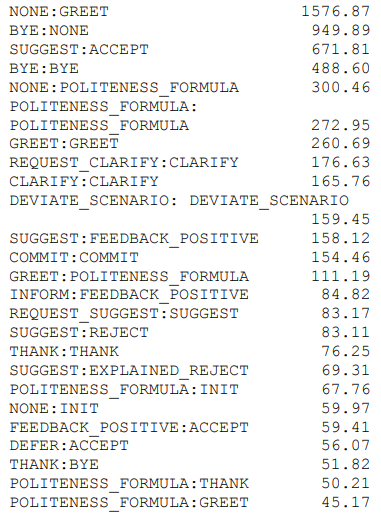

## MIDAS tags

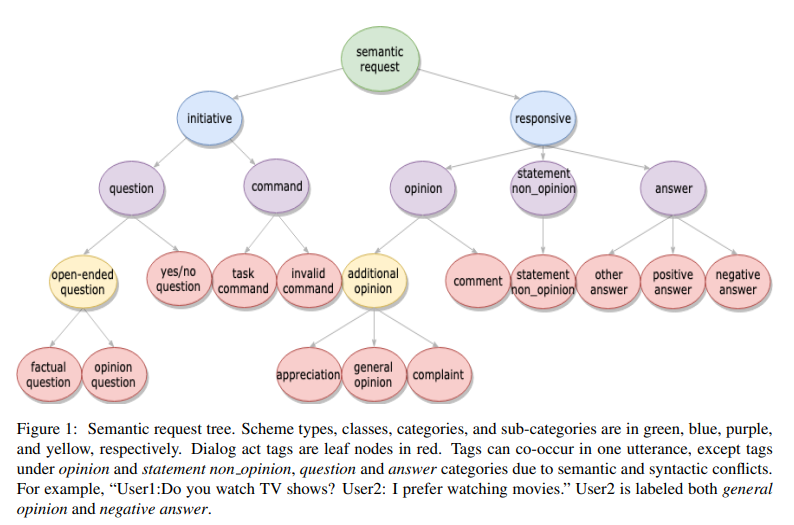

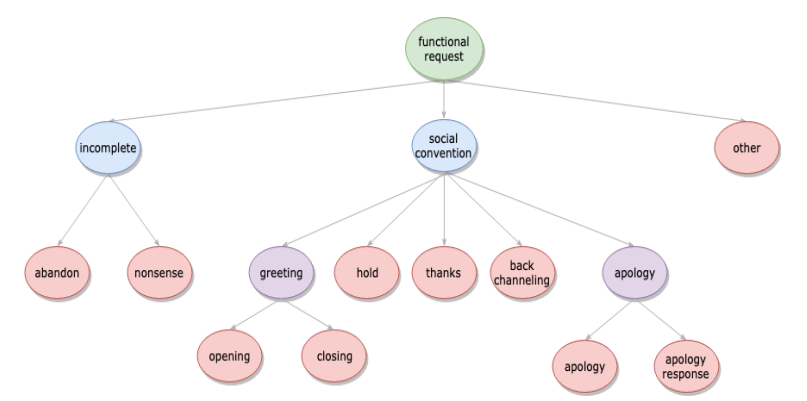